In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
application_file_id = '1BhQJsmHkA5o878C7_X2rjjqLw27ZjJjy'
application_url = f'https://drive.google.com/uc?id={application_file_id}'
previous_application_file_id = '1PMx5nZOWbYQAlgc_VvH1YXtZQ0qfPz0e'
previous_application_url = f'https://drive.google.com/uc?id={previous_application_file_id}'

In [3]:
application_data = pd.read_csv(application_url)

In [4]:
previous_application_data = pd.read_csv(previous_application_url)

In [5]:
application_data.shape

(49999, 122)

In [6]:
previous_application_data.shape

(49999, 37)

## Task A : Identify Missing Data and Deal with it Appropriately

###### Application data

In [7]:
# Calculate missing data percentage for each column
missing_data_percentage_application = (application_data.isnull().mean() * 100).round(2)

print("Null Percentage of Each Column:")
missing_data_percentage_application

Null Percentage of Each Column:


SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.47
AMT_REQ_CREDIT_BUREAU_WEEK    13.47
AMT_REQ_CREDIT_BUREAU_MON     13.47
AMT_REQ_CREDIT_BUREAU_QRT     13.47
AMT_REQ_CREDIT_BUREAU_YEAR    13.47
Length: 122, dtype: float64

In [8]:
# Filter columns with missing data percentage above 30%
columns_to_drop = missing_data_percentage_application[missing_data_percentage_application > 30].index
application_data_filtered = application_data.drop(columns=columns_to_drop)

In [9]:
# Calculate missing data count for the  columns
missing_data_count_application = application_data.isnull().sum()

# Filter columns with missing data percentage above 30% for visualization
missing_data_percentage_filtered_application = missing_data_percentage_application[missing_data_percentage_application > 30]

In [10]:
len(columns_to_drop)

50

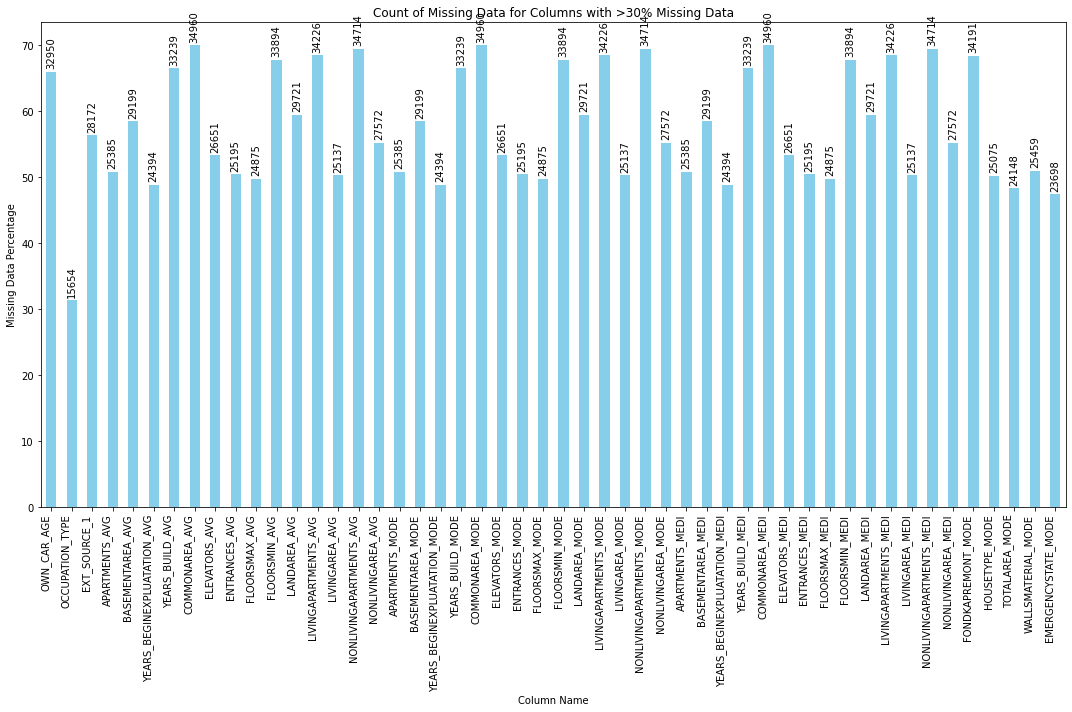

In [11]:
# Align the two Series
missing_data_count_application = missing_data_count_application.reindex(missing_data_percentage_filtered_application.index)

# Increase size of the graph
plt.figure(figsize=(15, 10))

# Visualize the proportion of missing values for each remaining variable
bars = missing_data_percentage_filtered_application.plot(kind='bar', color='skyblue')

# Add missing data count as text on the bars
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f'{missing_data_count_application.iloc[i]}', ha='center', va='bottom', rotation=90)

plt.title('Count of Missing Data for Columns with >30% Missing Data')
plt.xlabel('Column Name')
plt.ylabel('Missing Data Percentage')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

In [12]:
selected_columns_application = [
    'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 
  'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_HOUSING_TYPE',
    'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS'
]

# Select only the specified columns
selected_data_application = application_data_filtered.loc[:, selected_columns_application]



In [13]:
# Convert days column into years and take absolute value
selected_data_application['Age'] = (abs(application_data_filtered['DAYS_BIRTH'] / 365.25)).round(2)
selected_data_application['Experience'] = (abs(application_data_filtered['DAYS_EMPLOYED'] / 365.25)).round(2)

In [14]:
replace_values_marrige = {
    'Single / not married': 'Single',
    'Civil marriage': 'Married'
}

# Replace values in the 'NAME_FAMILY_STATUS' column
selected_data_application['NAME_FAMILY_STATUS'] = application_data_filtered['NAME_FAMILY_STATUS'].replace(replace_values_marrige)

In [15]:
selected_data_application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_HOUSING_TYPE,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,Age,Experience
0,100002,1,Cash loans,M,202500.0,406597.5,House / apartment,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single,25.90,1.74
1,100003,0,Cash loans,F,270000.0,1293502.5,House / apartment,35698.5,1129500.0,Family,State servant,Higher education,Married,45.90,3.25
2,100004,0,Revolving loans,M,67500.0,135000.0,House / apartment,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single,52.15,0.62
3,100006,0,Cash loans,F,135000.0,312682.5,House / apartment,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Married,52.03,8.32
4,100007,0,Cash loans,M,121500.0,513000.0,House / apartment,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single,54.57,8.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,157871,0,Cash loans,F,180000.0,1206000.0,House / apartment,45936.0,1206000.0,NaN,Working,Higher education,Single,29.20,0.78
49995,157872,0,Cash loans,M,126000.0,1125000.0,House / apartment,47794.5,1125000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,55.33,12.73
49996,157873,0,Cash loans,M,112500.0,900000.0,With parents,26316.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,28.15,3.17
49997,157874,0,Cash loans,F,270000.0,820638.0,House / apartment,34897.5,733500.0,Family,Working,Secondary / secondary special,Married,64.30,5.97


###### Previous application data

In [16]:
# Calculate missing data percentage for each column
missing_data_percentage_previous_application = (previous_application_data.isnull().mean() * 100).round(2)

print("Null Percentage of Each Column:")
missing_data_percentage_previous_application

Null Percentage of Each Column:


SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    21.18
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               50.40
AMT_GOODS_PRICE                21.49
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              50.40
RATE_INTEREST_PRIMARY          99.67
RATE_INTEREST_PRIVILEGED       99.67
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                48.49
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [17]:
# Filter columns with missing data percentage above 30%
columns_to_drop = missing_data_percentage_previous_application[missing_data_percentage_previous_application > 30].index
previous_application_data_filtered = previous_application_data.drop(columns=columns_to_drop)

In [18]:
# Calculate missing data count for the  columns
missing_data_count_previous_application = previous_application_data.isnull().sum()

# Filter columns with missing data percentage above 30% for visualization
missing_data_percentage_filtered_previous_application = missing_data_percentage_previous_application[missing_data_percentage_previous_application > 20]

In [19]:
len(columns_to_drop)

11

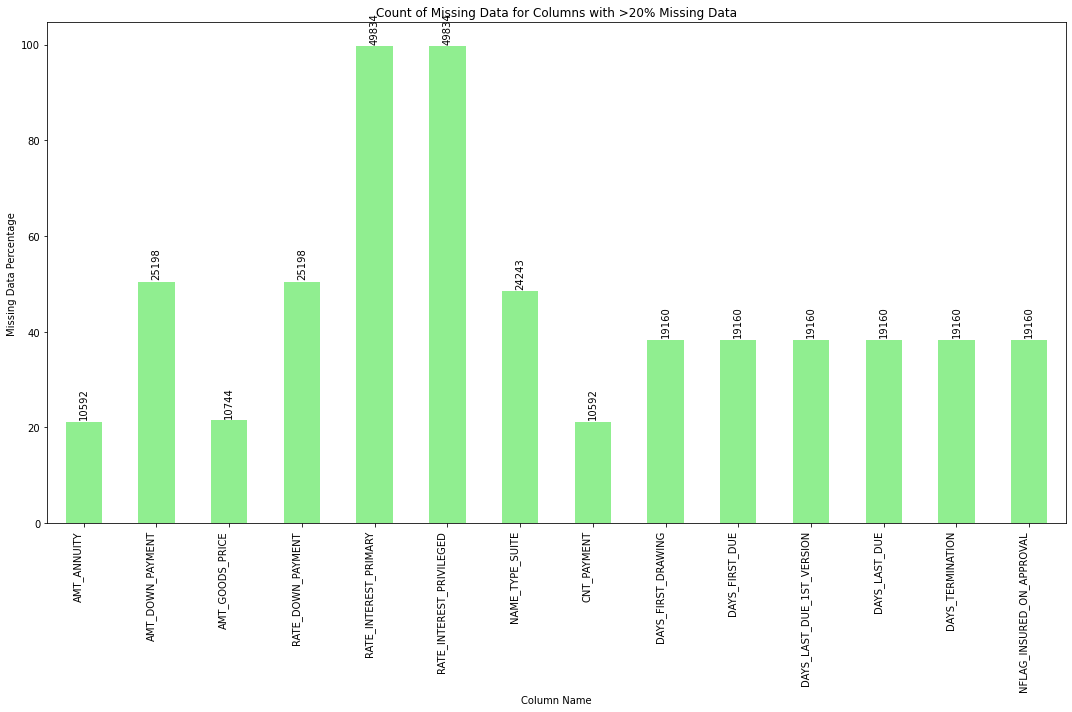

In [20]:
# Align the two Series
missing_data_count_previous_application = missing_data_count_previous_application.reindex(missing_data_percentage_filtered_previous_application.index)

# Increase size of the graph
plt.figure(figsize=(15, 10))

# Visualize the proportion of missing values for each remaining variable
bars = missing_data_percentage_filtered_previous_application.plot(kind='bar', color='lightgreen')

# Add missing data count as text on the bars
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f'{missing_data_count_previous_application.iloc[i]}', ha='center', va='bottom', rotation=90)

plt.title('Count of Missing Data for Columns with >20% Missing Data')
plt.xlabel('Column Name')
plt.ylabel('Missing Data Percentage')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

In [21]:
selected_columns_previous_application = [
    'SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 
    'AMT_ANNUITY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE',
    'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON' , 'NAME_YIELD_GROUP'
]

# Select only the specified columns
selected_data_previous_application = previous_application_data_filtered.loc[:, selected_columns_previous_application]



In [22]:
selected_data_previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,NAME_CASH_LOAN_PURPOSE,NAME_CLIENT_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.430,XAP,Repeater,Approved,XAP,middle
1,2802425,108129,Cash loans,25188.615,XNA,Repeater,Approved,XAP,low_action
2,2523466,122040,Cash loans,15060.735,XNA,Repeater,Approved,XAP,high
3,2819243,176158,Cash loans,47041.335,XNA,Repeater,Approved,XAP,middle
4,1784265,202054,Cash loans,31924.395,Repairs,Repeater,Refused,HC,high
...,...,...,...,...,...,...,...,...,...
49994,1171956,339569,Cash loans,NaN,XNA,Repeater,Refused,HC,XNA
49995,1904808,363980,Cash loans,NaN,XNA,Repeater,Canceled,XAP,XNA
49996,2331005,231295,Cash loans,22176.405,XNA,Repeater,Approved,XAP,middle
49997,1960897,346691,Cash loans,NaN,XNA,Repeater,Canceled,XAP,XNA


## Task B :  Identify Outliers in the Dataset

###### Application data

In [23]:
# Select numerical variables
numerical_variables_application = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'Age', 'Experience']

In [24]:
# Step 1: Calculate summary statistics
summary_statistics_application = selected_data_application[numerical_variables_application].describe()
print("Summary Statistics:")
summary_statistics_application

Summary Statistics:


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,Age,Experience
count,4.999900e+04,4.999900e+04,49998.000000,4.996100e+04,49999.000000,49999.000000
mean,1.707676e+05,5.997006e+05,27107.377355,5.390600e+05,43.865976,183.874786
std,5.318191e+05,4.024154e+05,14562.944435,3.698533e+05,11.940867,380.445674
min,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,21.030000,0.000000
25%,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,33.890000,2.550000
50%,1.458000e+05,5.147775e+05,24939.000000,4.500000e+05,43.070000,6.070000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,53.780000,15.660000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,68.950000,999.980000


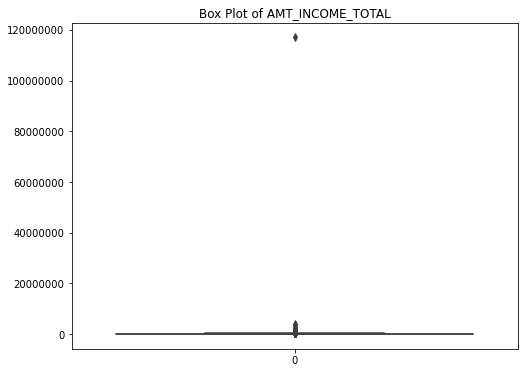

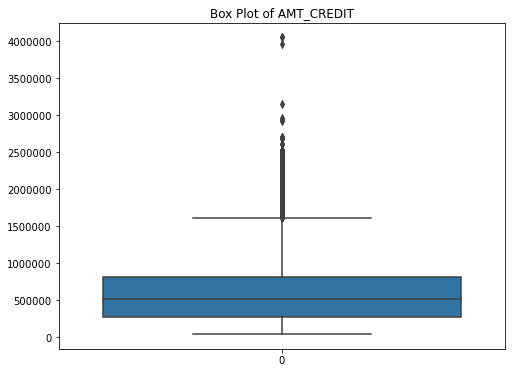

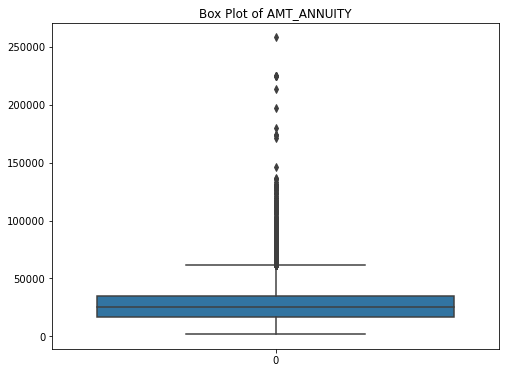

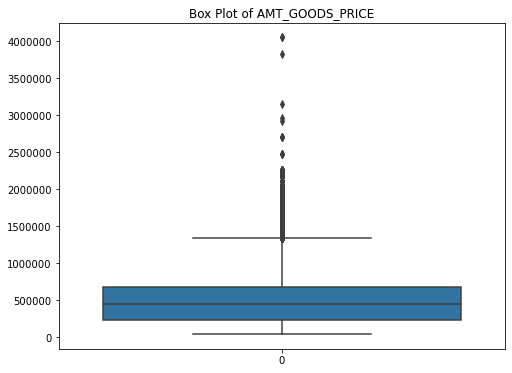

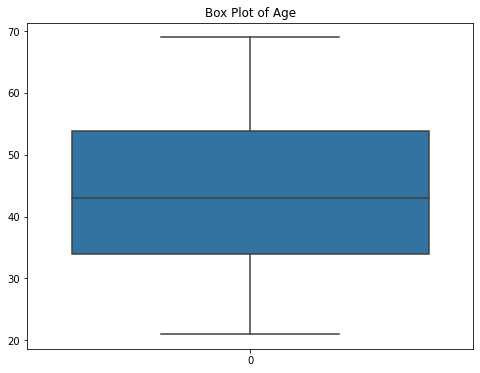

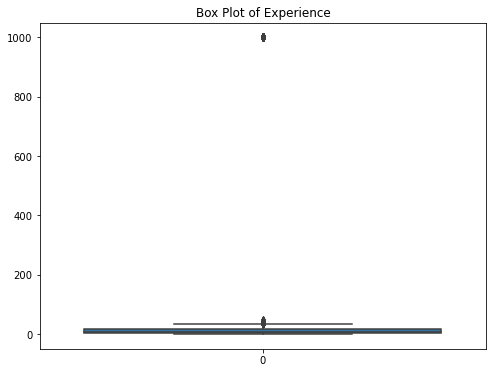

In [25]:
for var in numerical_variables_application:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=selected_data_application[var])
    plt.title(f'Box Plot of {var}')
    plt.ticklabel_format(style='plain', axis='y')  # Display full y-axis values
    plt.show()

In [26]:
# Step 3: Detect outliers using the Interquartile Range (IQR) method
Q1 = selected_data_application[numerical_variables_application].quantile(0.25)
Q3 = selected_data_application[numerical_variables_application].quantile(0.75)
IQR = Q3 - Q1

# Initialize a dictionary to store outlier counts for each column
outlier_counts = {}

# Iterate over each numerical variable
for column in numerical_variables_application:
    # Calculate lower bound and upper bound for the column
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    
    # Count outliers for the column
    outliers_count = ((selected_data_application[column] < lower_bound) | (selected_data_application[column] > upper_bound)).sum()
    
    # Store the outlier count for the column in the dictionary
    outlier_counts[column] = outliers_count

# Convert the outlier counts dictionary to a DataFrame for easier plotting
outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])


In [27]:

outliers = ((selected_data_application[numerical_variables_application] < (Q1 - 1.5 * IQR)) | (selected_data_application[numerical_variables_application] > (Q3 + 1.5 * IQR))).any(axis=1)

# Display the outliers
outlier_data_application = selected_data_application[outliers]
print("Outlier Data:")
outlier_data_application

Outlier Data:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_HOUSING_TYPE,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,Age,Experience
6,100009,0,Cash loans,F,171000.000,1560726.0,House / apartment,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,37.72,8.57
7,100010,0,Cash loans,M,360000.000,1530000.0,House / apartment,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,51.61,1.23
8,100011,0,Cash loans,F,112500.000,1019610.0,House / apartment,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,55.03,999.98
11,100015,0,Cash loans,F,38419.155,148365.0,House / apartment,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,55.90,999.98
22,100026,0,Cash loans,F,450000.000,497520.0,Rented apartment,32521.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,30.52,11.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49966,157838,0,Cash loans,F,180000.000,1701729.0,House / apartment,70357.5,1588500.0,Unaccompanied,Working,Secondary / secondary special,Married,38.14,8.21
49970,157843,0,Cash loans,F,270000.000,675000.0,House / apartment,26901.0,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,60.53,999.98
49981,157855,0,Cash loans,F,112500.000,237204.0,House / apartment,10575.0,198000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,64.88,999.98
49988,157863,0,Revolving loans,F,162000.000,540000.0,House / apartment,27000.0,540000.0,Family,Pensioner,Secondary / secondary special,Married,58.27,999.98


<Figure size 720x432 with 0 Axes>

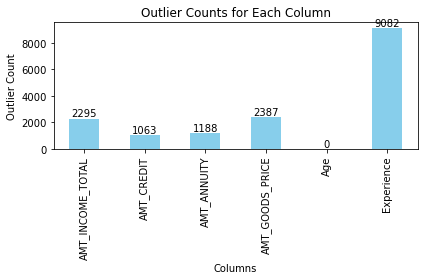

In [28]:
# Plot the outlier counts
plt.figure(figsize=(10, 6))
outlier_counts_df.plot(kind='bar', color='skyblue', legend=None)
plt.title('Outlier Counts for Each Column')
plt.xlabel('Columns')
plt.ylabel('Outlier Count')
plt.xticks(rotation=90)
plt.tight_layout()
# Add text annotations to each bar
for i, val in enumerate(outlier_counts_df['Outlier Count']):
    plt.text(i, val, str(val), ha='center', va='bottom')
plt.show()

## Task C : Analyze Data Imbalance 

In [29]:
# Step 1: Determine class frequencies of the target variable
class_frequencies = selected_data_application['TARGET'].value_counts()
print("Class Frequencies:")
class_frequencies

Class Frequencies:


0    45973
1     4026
Name: TARGET, dtype: int64

In [30]:
# Step 2: Calculate proportions of each class
total_samples = class_frequencies.sum()
class_proportions = class_frequencies / total_samples * 100  # Convert to percentage
class_proportions = class_proportions.round(2)  # Round to 2 decimal places
class_proportions = class_proportions.astype(str) + '%'  # Add '%' symbol
print("\nClass Proportions:")
class_proportions


Class Proportions:


0    91.95%
1     8.05%
Name: TARGET, dtype: object

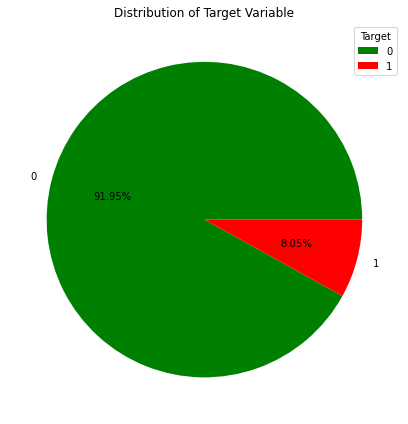

In [31]:
# Step 3: Visualize the distribution of the target variable
plt.figure(figsize=(6, 6))
plt.pie(class_frequencies, labels=class_frequencies.index, autopct='%1.2f%%', colors=['green', 'red'])
plt.title('Distribution of Target Variable')
# Add legend
plt.legend(title='Target', labels=['0', '1'], loc='upper right')
plt.tight_layout()
plt.show()

## Task D : Perform Univariate, Segmented Univariate, and Bivariate Analysis

###### Segmented Analysis for few categorical columns in selected_data_application dataframe

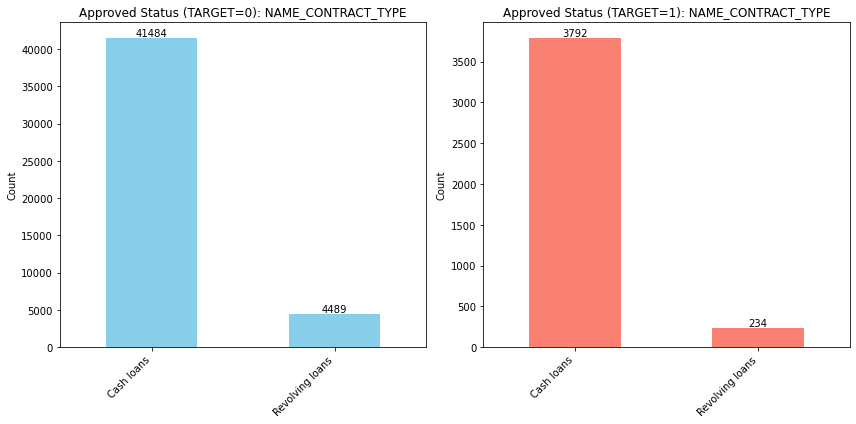

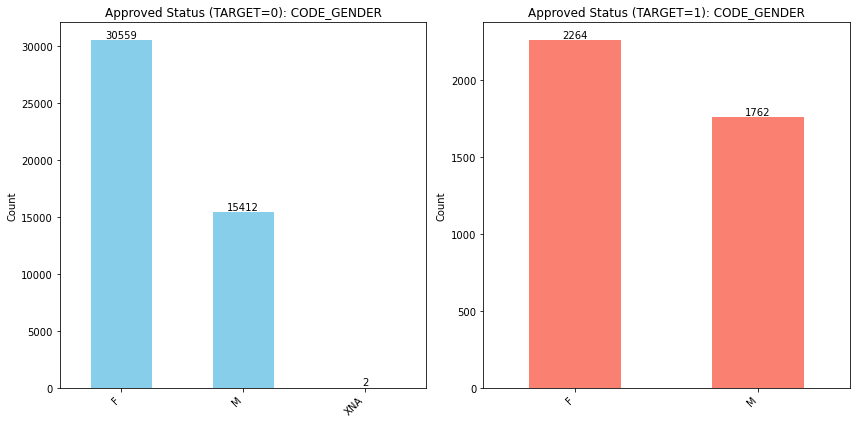

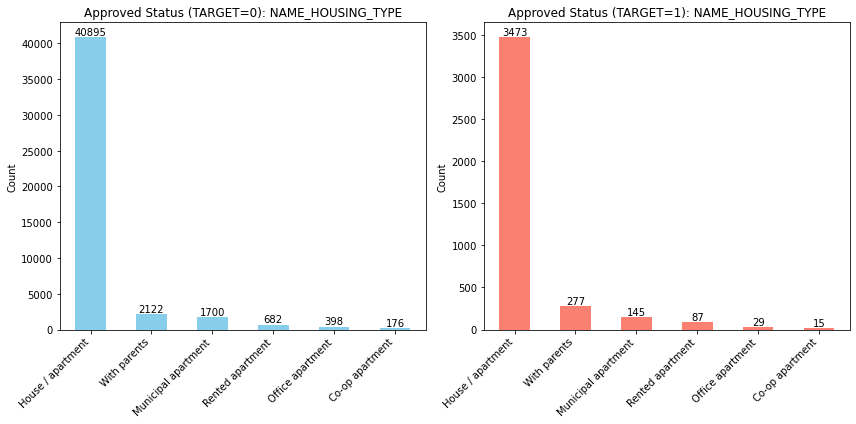

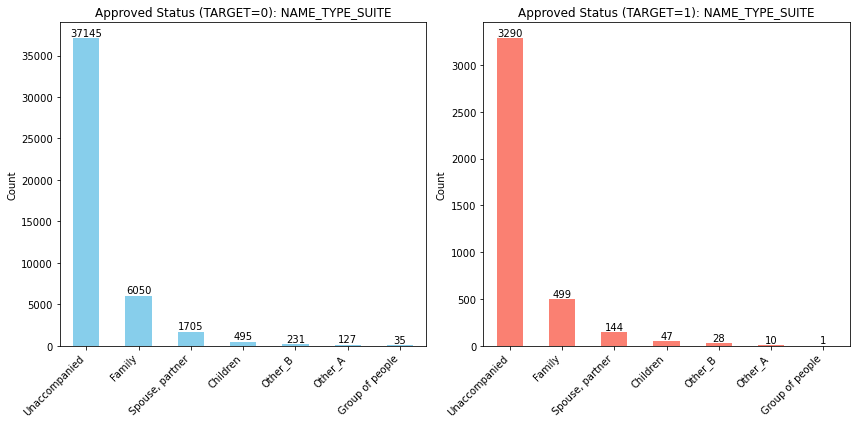

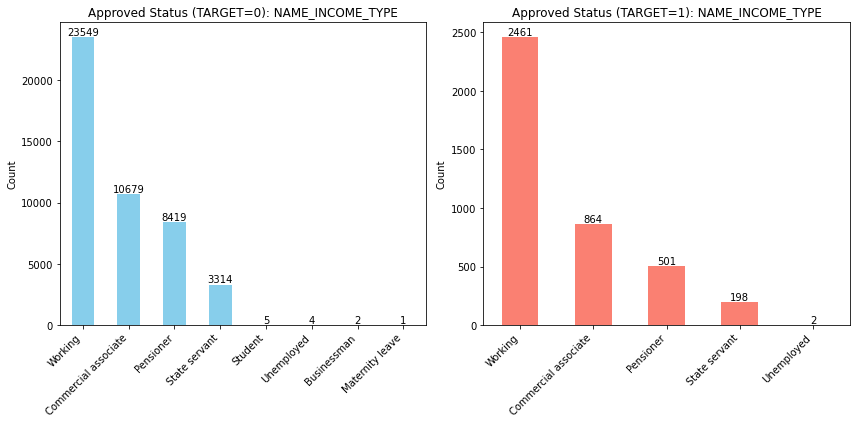

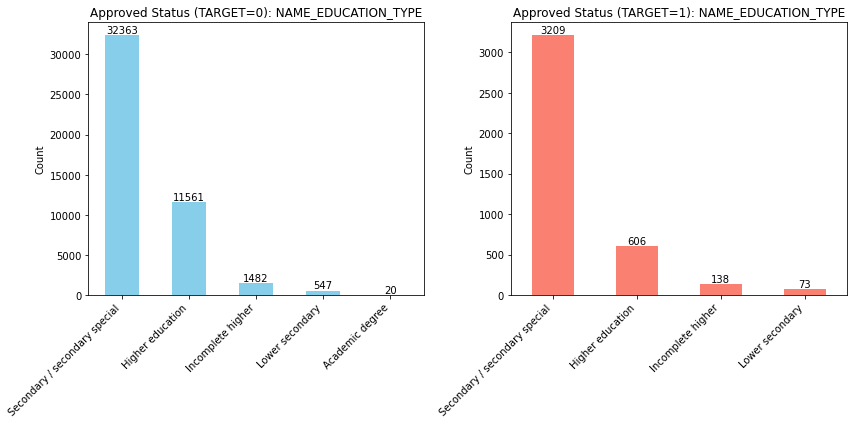

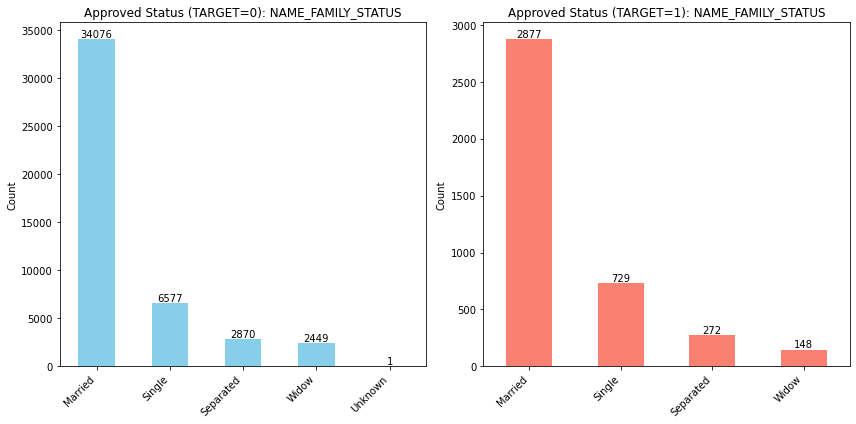

In [32]:
# List of categorical variables
categorical_variables = selected_data_application.select_dtypes(include='object')

# Split data based on the target column
target_0 = selected_data_application[selected_data_application['TARGET'] == 0]
target_1 = selected_data_application[selected_data_application['TARGET'] == 1]

# Plot bar plots for each subset
for i in categorical_variables:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    ax = target_0[i].value_counts().plot.bar(color='skyblue')
    plt.title(f"Approved Status (TARGET=0): {i}")
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.subplot(1, 2, 2)
    ax = target_1[i].value_counts().plot.bar(color='salmon')
    plt.title(f"Approved Status (TARGET=1): {i}")
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


###### Univariate analysis

In [33]:
# Define numerical and categorical variables
numerical_variables = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'Age', 'Experience']
categorical_variables = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE', 
                         'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']


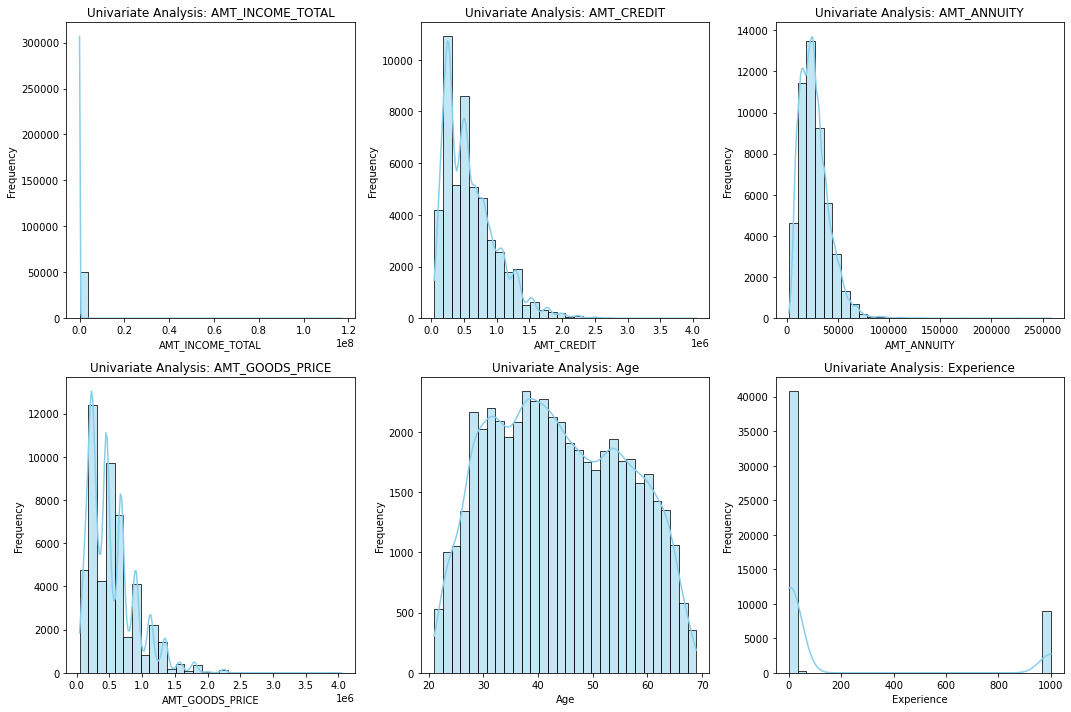

In [34]:
# Univariate analysis for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(selected_data_application[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Univariate Analysis: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

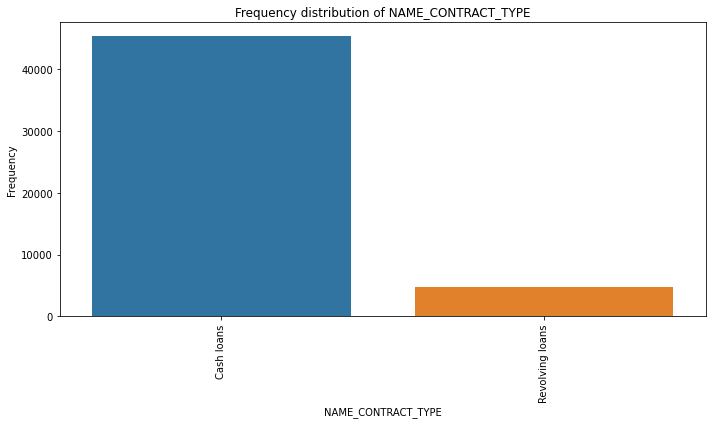

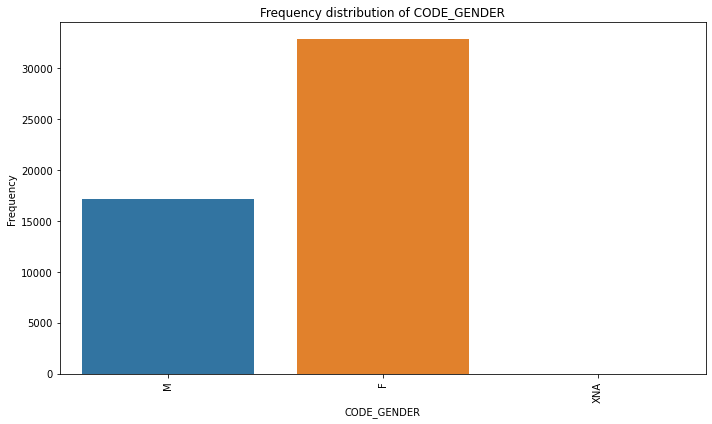

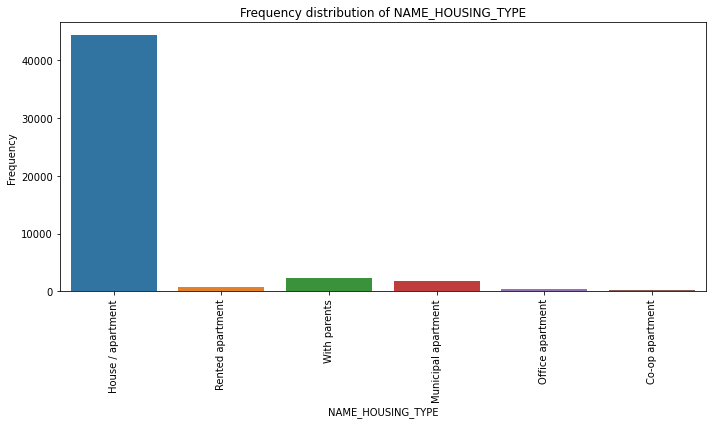

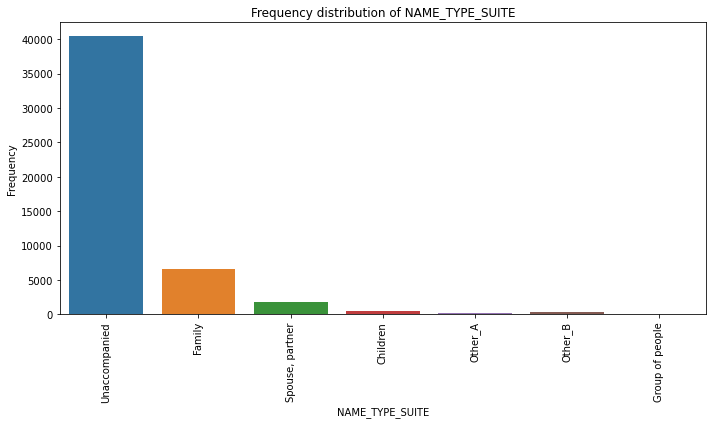

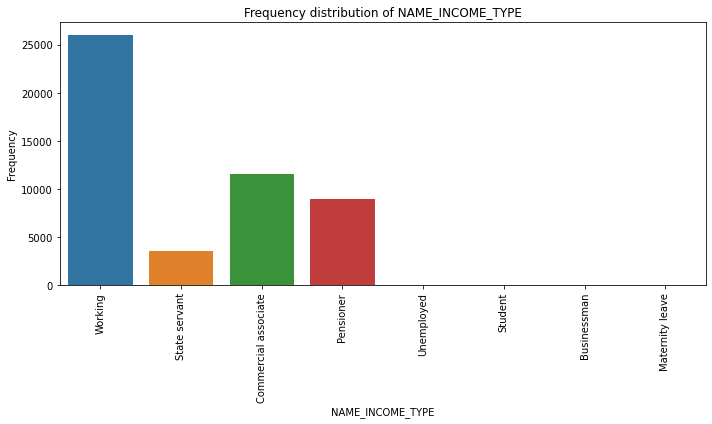

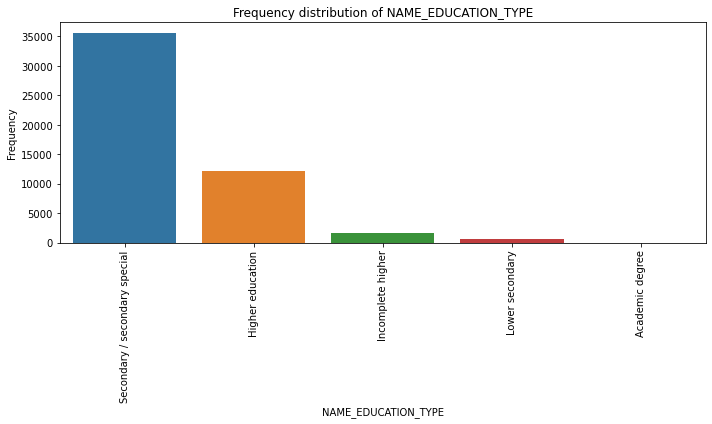

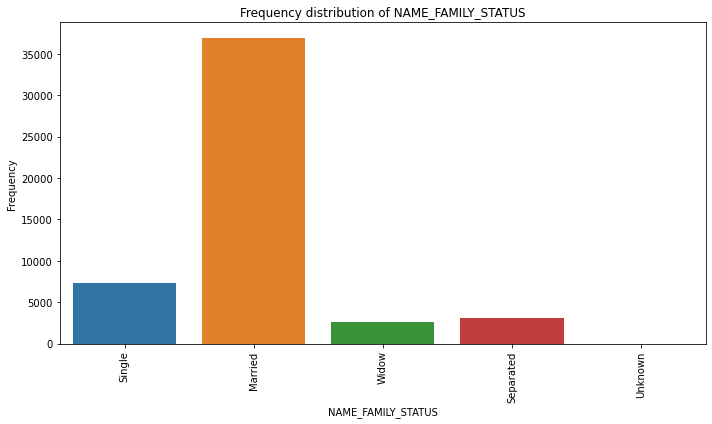

In [39]:
# Create separate plots for each categorical variable
for column in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=selected_data_application, x=column)
    plt.title(f'Frequency distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate x-axis labels
    plt.tight_layout()

    # Show each plot separately
    plt.show()

###### Bivariate Analysis

<Figure size 1080x1800 with 0 Axes>

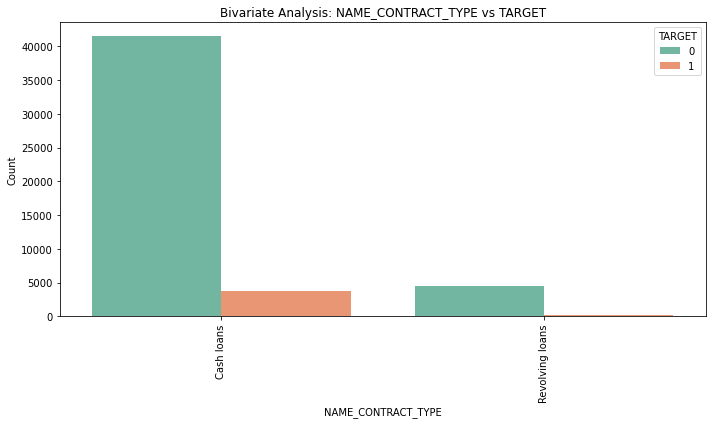

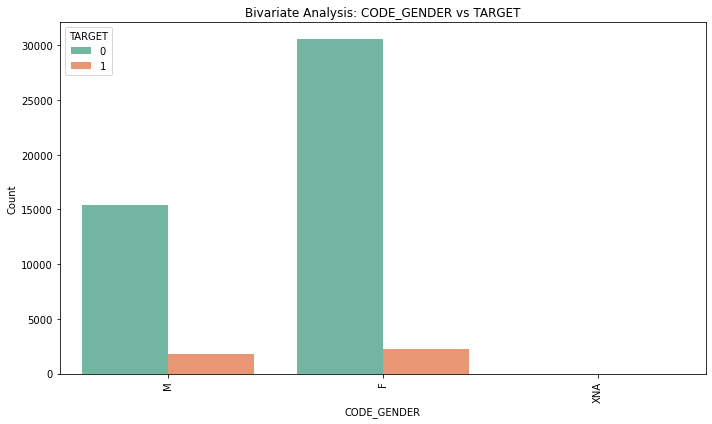

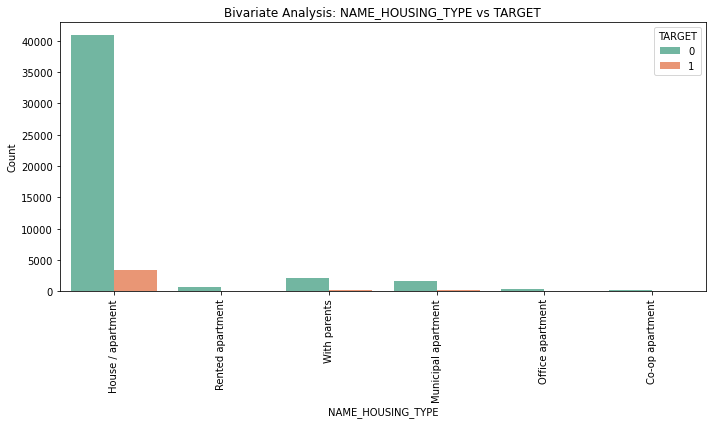

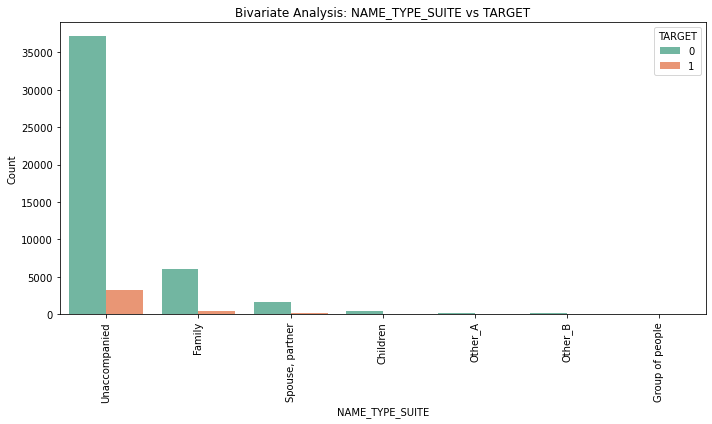

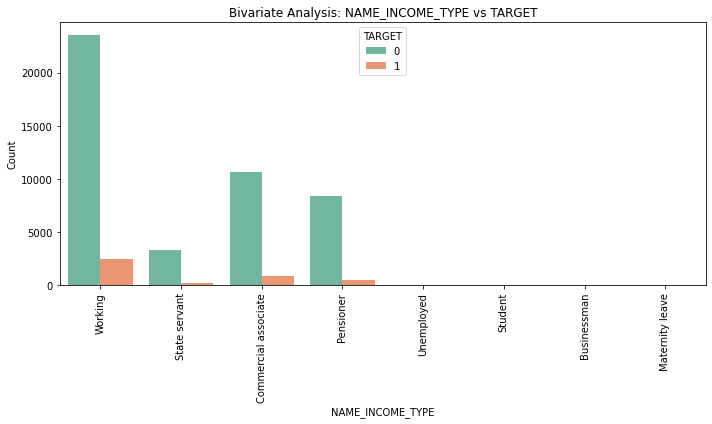

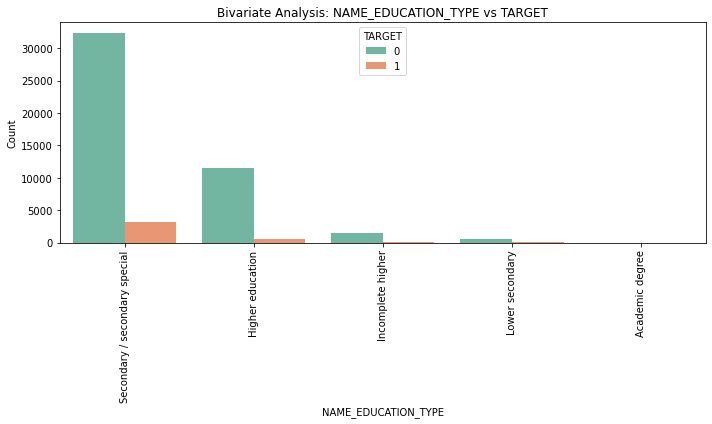

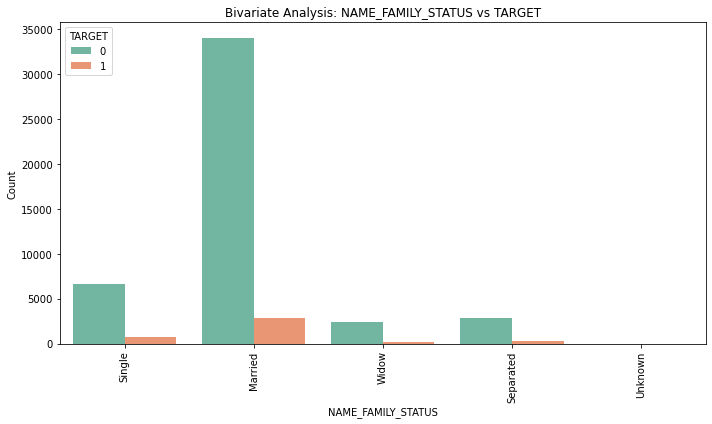

In [40]:
# Bivariate analysis for categorical variables using clustered bar charts
plt.figure(figsize=(15, 25))
for i, cat_var in enumerate(categorical_variables, 1):
    plt.figure(figsize=(10, 6))  # Create a new figure for each categorical variable
    sns.countplot(x=cat_var, hue='TARGET', data=selected_data_application, palette='Set2')
    plt.title(f'Bivariate Analysis: {cat_var} vs TARGET')
    plt.xlabel(cat_var)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show each plot separately


## Task E: Identify Top Correlations for Different Scenarios

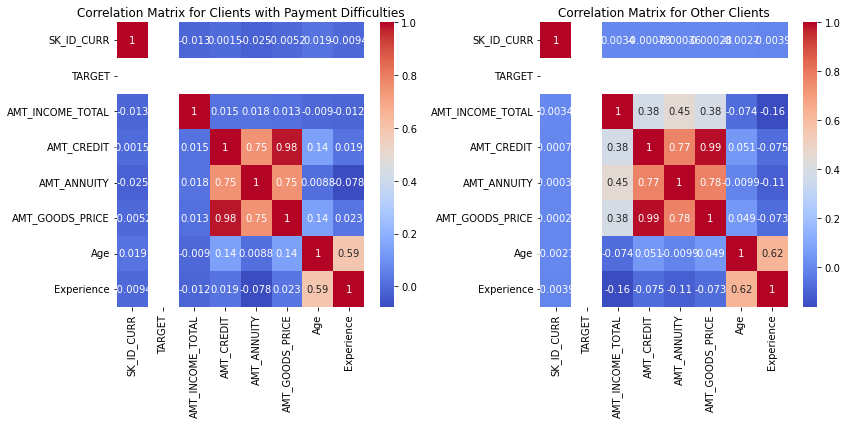

In [36]:
# Segment the dataset based on different scenarios
clients_payment_difficulties = selected_data_application[selected_data_application['TARGET'] == 1]
other_clients = selected_data_application[selected_data_application['TARGET'] == 0]

# Calculate correlations within each segment
correlation_difficulties = clients_payment_difficulties.corr()
correlation_other = other_clients.corr()

# Identify top correlations for each scenario
top_corr_difficulties = correlation_difficulties['TARGET'].sort_values(ascending=False)[1:]
top_corr_other = correlation_other['TARGET'].sort_values(ascending=False)[1:]

# Visualize correlations using heatmaps
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_difficulties, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix for Clients with Payment Difficulties')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_other, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix for Other Clients')

plt.tight_layout()
plt.show()


#### Through the heatmap we can see same set of columns seem to have a high correlation across all three data sets. Top correlate colums are:
- AMT_GOOD_PRICE vs AMT_CREDIT
- AMT_GOOD_PRICE vs AMT_ANNUITY
- AMT_CREDIT_AMT_ANNUITY